In [1]:
from modules import *

导入了模块：lecory_data_process, lecroy, myInterpolation


In [3]:
QE_6V = ReadData(r'spectrum\QE\QE_J60035_6V.txt')
QE_6V = myInterpolation(QE_6V,plot=False,smooth_window=1).process()

QE_2V = ReadData(r'spectrum\QE\QE_J60035_2.5V.txt')
QE_2V = myInterpolation(QE_2V,plot=False,smooth_window=1).process()

EM_GAGG = ReadData(r'spectrum\scintillator_实测\Em_GAGG.txt')
EM_GAGG = myInterpolation(EM_GAGG,plot=False,smooth_window=1).process()

calculate_weighted_average(EM_GAGG, QE_6V)
calculate_weighted_average(EM_GAGG, QE_2V)

Successfully auto read spectrum\QE\QE_J60035_6V.txt using separator ',', data shape is (306, 2)
Successfully auto read spectrum\QE\QE_J60035_2.5V.txt using separator ',', data shape is (233, 2)
Successfully auto read spectrum\scintillator_实测\Em_GAGG.txt using separator ',', data shape is (71, 3)
The average of QE_J60035_6V weighted by Em_GAGG is: 27.91588285687971
The average of QE_J60035_2 weighted by Em_GAGG is: 18.84963924856609


18.84963924856609

Successfully auto read spectrum\Absorption\CsI_Tl.txt using separator ',', data shape is (88, 2)


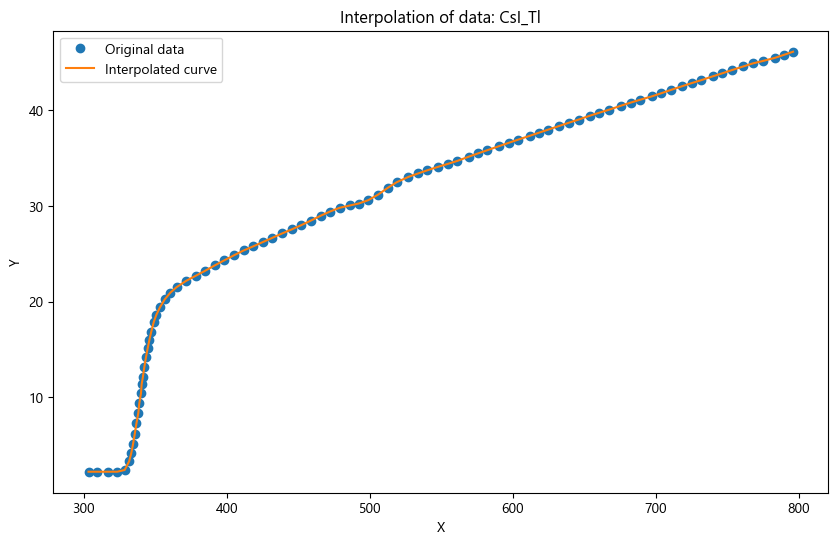

In [4]:
datafile = ReadData(r'spectrum\Absorption\CsI_Tl.txt')
CsI_ABS = myInterpolation(datafile,plot=True,smooth_window=1).process()

In [1]:
# 光谱波长转换为能量，按C++格式输出

import numpy as np

# 普朗克常数 (eV·s)
h = 4.135667696e-15
# 光速 (m/s)
c = 3.0e8

# 假设 CsI_EM.x 是波长信息，CsI_EM.y 是发射光谱信息
data = CsI_ABS
wavelengths = data.x
emission_spectrum = data.y

# 将波长转换为能量 (eV)
energies = (h * c) / (wavelengths * 1e-9)  # 波长从 nm 转换为 m

# 对能量进行排序
sorted_indices = np.argsort(energies) # 元素从小到大排序的索引
sorted_energies = energies[sorted_indices]
sorted_emission_spectrum = emission_spectrum[sorted_indices]

# 生成C++格式的输出
def format_cpp_vector(name, values, unit=None):
    cpp_output = f"std::vector<G4double> {name} =\n    {{ "
    for i, value in enumerate(values):
        if unit:
            cpp_output += f"{value:.5f}*{unit}"
        else:
            cpp_output += f"{value:.5f}"
        if i < len(values) - 1:
            cpp_output += ", "
        if (i + 1) % 6 == 0 and i < len(values) - 1:
            cpp_output += "\n      "
    cpp_output += " };\n"
    return cpp_output

cpp_output = format_cpp_vector("PhotonEnergy_ABSROTION", sorted_energies, "eV")
cpp_output += "\n"
cpp_output += format_cpp_vector("FastComponent", sorted_emission_spectrum, "cm")

print(cpp_output)

NameError: name 'CsI_ABS' is not defined